## INFO 2950 Final Project
Larrisa Chen (lc949), Michelle Li (myl39), Christina Jin (cej65), Jade Eggleston (jce76)

### Research question
***Do the criteria for a successful Airbnb differ in U.S. regions?***

Where success is defined as:
- high number of bookings combined with high listing rating

and criteria is defined by:
- Price
- Number of Beds
- Number of Baths
- Host ratings
- Number of reviews 
- Private or Public
- Proximity to urban center (most popular neighborhood)
- Neighborhood
- Keywords in names
- Keywords in description
- Host response rate / time
- Room type
- Amenities (binary)
    - varies by region

The list of amenities is scraped from each of the cities listed below and aggregated to find the top 15 in each region. 

Ultimately, we want to deduce the attributes that contribute to a successful Airbnb listing and compare these listings across different regions in the U.S. (Northeast, Southeast, Southeast, West, Northwest, and Midwest).


### Data Origin/Description

Our data is sourced from http://insideairbnb.com/get-the-data/.

We aggregated data from cities which receive the highest number of inbound tourism in each region from *link*.
The cities being analyzed are as follows:
- New England: Boston
- Middle Atlantic: New York City
- East North Central: Chicago
- West North Central: Minneapolis
- South Atlantic: Miami
- East South Central: Nashville
- West South Central: San Antonio
- Mountain: Las Vegas
- Pacific: Los Angeles



For each city, we want to analyze:
- Lisitng data with columns:
    - id
    - name
    - description
    - host_since
    - host_about
    - host_response_time
    - host_response_rate
    - host_acceptance_rate
    - host_is_superhost
    - host_listings_count
    - host_has_profile_pic
    - host_identity_verified
    - neighbourhood_cleansed
    - neighbourhood_group_cleansed
    - room_type
    - accommodates
    - bathrooms_text
    - bedrooms
    - beds
    - amenities
    - price
    - minimum_nights
    - maximum_nights
    - number_of_reviews
    - last_review
    - review_scores_rating
    - instant_bookable

- and booking data with columns:
    - list columns here


### Data Collection & Cleaning

We begin by removing all rows which contain NaN, so that analyzation can take place where all columns are one type.

Then, we analyze the columns and manually delete the following:
- listing_url
    - Repetitive data 
- Maximum_maximum_nights
    - Repetitive data
- Minimum_nights_avg_ntm
    - Repetitive data
- Maximum_nights_avg_ntm
    - Repetitive data
- Calendar_updated
    - Only contains empty data
- Has_availability
    - All true, redundent
- availability_30
    - Assuming users only evaluate criteria for listings that are available
- availability_60
    - Assuming users only evaluate criteria for listings that are available
- availability_90
    - Assuming users only evaluate criteria for listings that are available
- Availability_365
    - Assuming users only evaluate criteria for listings that are available
- calendar_last_scraped
- Number_of_reviews_ltm
    - Correlated to number_of_reviews, redundant
- Number_of_reviews_l30d
    - Correlated to number_of_reviews, redundant
- First_review
    - Redundant information because we have host_since
- Review_scores_accuracy
    - Correlated to review_scores_rating
- Review_scores_cleanliness
    - Correlated to review_scores_rating
- Review_scores_checkin
    - Correlated to review_scores_rating
- Review_scores_communication
    - Correlated to review_scores_rating
- Review_scores_location
    - Correlated to review_scores_rating
- Review_scores_value
    - Correlated to review_scores_rating
- License
    - Only contains empty data
- calculated_host_listings_count
- Calculated_host_listings_count_entire_homes
    - Information about host’s other listings are not relevant to this listing
- Calculated_host_listings_count_private_rooms
    - Information about host’s other listings are not relevant to this listing
- Calculated_host_listings_count_shared_rooms
    - Information about host’s other listings are not relevant to this listing
- Reviews_per_month
    - Too dependent on other people’s stay time, irrelevant metric 
- Neighbourhood_group_cleansed
    - Inconsistent across different cities
- House_availability
    - If listing is unavailable, users will not view it and it will by default not be the best listing


In [1]:
import numpy as np
import pandas as pd
import regex as re
import json

In [2]:
def percent_to_float(x):
    return float(x.strip("%"))/100.0

def dollar_to_float(x):
    x = x.replace(",", "")
    x = x.replace("$", "")
    return float(x)

def str_to_bool(x):
    if(x == "f"):
        return False
    else:
        return True
    
def room_type_to_bool(x):
    if(x == "Shared room"):
        return False
    return True

def bathrooms_text_to_bool(x):
    if(str(x).find("shared") != -1 or str(x).find("Shared") != -1):
        return False
    return True
    
def amenities_to_list(x):
    return json.loads(x)
    
def host_response_time_to_int(x):
    if(x == "within an hour"):
        return 0
    elif(x == "within a few hours"):
        return 1
    elif(x == "within a day"):
        return 2
    elif(x == "a few days or more"):
        return 3
    elif(x == "None"):
        return 4
    
def bathroom_text_to_float(x):
    if(x.find("half-bath") != -1 or x.find("Half-bath") != -1):
        return 0.5
    elif(re.search(r"d+\.\d+", x) != None):
        return float(re.search(r"d+\.\d+", x).group())
    return int(re.search(r"\d+", x).group())

def is_string(x):
    for letter in x:
        if((letter >= "A" and letter <= "Z") or (letter >= "a" and letter <="z") or (letter >= "0" and letter <= "9")):
            return True;
    return False;

nyc_listings_df = pd.read_csv("nyc_listings.csv")

nyc_listings_df = nyc_listings_df[nyc_listings_df["host_about"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_response_time"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_response_rate"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_acceptance_rate"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["last_review"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["review_scores_rating"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["description"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["beds"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["bedrooms"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["bathrooms_text"].notna()]

nyc_listings_df = nyc_listings_df[nyc_listings_df["host_about"].apply(is_string)]
nyc_listings_df = nyc_listings_df[nyc_listings_df["name"].apply(is_string)]
nyc_listings_df = nyc_listings_df[nyc_listings_df["description"].apply(is_string)]

nyc_listings_df["host_response_rate"] = nyc_listings_df["host_response_rate"].apply(percent_to_float)
nyc_listings_df["host_acceptance_rate"] = nyc_listings_df["host_acceptance_rate"].apply(percent_to_float)
nyc_listings_df["price"] = nyc_listings_df["price"].apply(dollar_to_float)
nyc_listings_df["instant_bookable"] = nyc_listings_df["instant_bookable"].apply(str_to_bool)
nyc_listings_df["host_identity_verified"] = nyc_listings_df["host_identity_verified"].apply(str_to_bool)
nyc_listings_df["host_has_profile_pic"] = nyc_listings_df["host_has_profile_pic"].apply(str_to_bool)
nyc_listings_df["host_is_superhost"] = nyc_listings_df["host_is_superhost"].apply(str_to_bool)
nyc_listings_df["host_response_time"] = nyc_listings_df["host_response_time"].apply(host_response_time_to_int)
nyc_listings_df["amenities"] = nyc_listings_df["amenities"].apply(amenities_to_list)

nyc_listings_df = nyc_listings_df.rename(columns={"room_type": "is_private_room"})
nyc_listings_df["is_private_room"] = nyc_listings_df["is_private_room"].apply(room_type_to_bool)
nyc_listings_df["is_private_bath"] = nyc_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
nyc_listings_df = nyc_listings_df.rename(columns={"bathrooms_text": "baths"})
nyc_listings_df["baths"] = nyc_listings_df["baths"].apply(bathroom_text_to_float)
nyc_listings_df["is_private_overall"] = nyc_listings_df["is_private_room"] & nyc_listings_df["is_private_bath"]

nyc_listings_df["host_since"] = pd.to_datetime(nyc_listings_df["host_since"])
nyc_listings_df["last_review"] = pd.to_datetime(nyc_listings_df["last_review"])

print(nyc_listings_df.dtypes)
print(nyc_listings_df.shape)
print(nyc_listings_df)

nyc_calendar_df = pd.read_csv("nyc_calendar.csv")
nyc_calendar_df = nyc_calendar_df.drop("price", axis=1)
nyc_calendar_df = nyc_calendar_df.drop("adjusted_price", axis=1)
nyc_calendar_df["date"] = pd.to_datetime(nyc_calendar_df["date"])
nyc_calendar_df["available"] = nyc_calendar_df["available"].apply(str_to_bool)

print(nyc_calendar_df)
print(nyc_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count              float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
is_private_room                     bool
accommodates                       int64
baths                            float64
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

### Data Limitations


### Exploratory Data Analysis

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [5]:
# nyc_listings_df = pd.read_csv("nyc_listings.csv")
# nyc_calendar_df = pd.read_csv("nyc_calendar.csv")

In [5]:
%sql SELECT DISTINCT host_response_time FROM nyc_listings_df 

,host_response_time
0,0
1,1
2,2
3,3


In [22]:
# %sql SELECT DISTINCT room_type FROM nyc_listings_df

In [23]:
# %sql SELECT DISTINCT bathrooms_text FROM nyc_listings_df

In [24]:
# %sql SELECT COUNT(bathrooms_text) FROM nyc_listings_df WHERE bathrooms_text = '0 baths' 

In [6]:
%sql SELECT * FROM nyc_listings_df WHERE review_scores_rating IS NOT NULL ORDER BY review_scores_rating ASC 

,id,name,description,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,amenities,price,minimum_nights,maximum_nights,number_of_reviews,last_review,review_scores_rating,instant_bookable,is_private_bath,is_private_overall
0,2.632320e+05,Cozy&Clean in a great neighborhood,"My place is good for couples, solo adventurers...",2011-11-07,I work in NYC as a Fashion Designer. I am from...,2,0.50,0.00,False,1.0,...,"['Elevator', 'Heating', 'TV', 'Security camera...",157.0,30,30,1,2019-01-27,0.0,False,True,True
1,6.672758e+06,Cool Large 3 bedrooms in the heart of East vil...,3 MONTHS MINIMUM.<br /><br /><br />This furnis...,2012-04-22,my favorite cities in the world\nnew york\nPar...,3,0.05,0.17,False,5.0,...,"['Hair dryer', 'Essentials', 'Carbon monoxide ...",225.0,30,30,1,2018-03-10,0.0,True,True,True
2,1.597414e+07,100$,I am renting my super cozy and very spacious 1...,2015-09-29,A happy Brazilian girl leaving in the capitol ...,2,1.00,0.67,False,1.0,...,"['Hair dryer', 'Essentials', 'Hot water', 'Hea...",100.0,30,30,1,2018-01-07,0.0,False,False,False
3,2.590499e+07,Bedstuy spacious townhouse w. amazing backyard,"Beautiful duplex townhouse on a safe, friendly...",2010-07-20,We are a young (at least we feel young ;) and ...,2,0.75,0.50,False,1.0,...,"['Hair dryer', 'Essentials', 'Iron', 'Hot wate...",275.0,10,75,2,2019-12-16,0.0,False,True,True
4,2.758348e+07,River View!,"Spacious, neat, beautiful, and quiet one-bedro...",2013-01-02,"cool easy going,",1,1.00,0.00,False,1.0,...,"['Hair dryer', 'Essentials', 'Iron', 'Dishes a...",120.0,30,120,1,2018-08-08,0.0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11092,2.453984e+07,Luxury Furnished 2 Bedroom Apartment Jersey City,"Soaring 50 stories above the Hudson River, thi...",2013-10-14,We have been providing vacation rental apartme...,0,0.99,0.62,False,327.0,...,"['Microwave', 'Coffee maker', 'Long term stays...",499.0,27,1125,1,2020-01-03,5.0,True,True,True
11093,5.584635e+17,"Jersey City 2BR w/ Elevator, Gym & W/D, nr PATH",Show up and start living from day one in New J...,2016-12-16,"We’re Blueground, a global proptech company wi...",0,1.00,0.97,False,4022.0,...,"['Microwave', 'Coffee maker', 'Gym', 'Long ter...",311.0,31,1125,1,2022-06-02,5.0,True,True,True
11094,6.786148e+17,One Bedroom Apartment With A Manhattan View,1 Bedroom Apartment overlooking NYC. The view ...,2021-01-20,Host looking to provide you with a comfortable...,0,0.81,0.90,False,1.0,...,"['Paid parking on premises', 'First aid kit', ...",210.0,5,365,2,2022-08-30,5.0,True,True,True
11095,5.426634e+07,Luxe Industrial Loft in Heart of City near NYC,Experience Jersey City in a luxe industrial lo...,2020-07-31,Hey! My name is Jeff and I am a traveling seri...,2,0.67,1.00,False,2.0,...,"['First aid kit', 'Body soap', 'Stainless stee...",170.0,30,365,5,2022-07-06,5.0,True,True,True


In [8]:
nyc_calendar_df.head()

,listing_id,date,available,minimum_nights,maximum_nights
0,2539,2022-09-07,False,30.0,730.0
1,2539,2022-09-08,False,30.0,730.0
2,2539,2022-09-09,False,30.0,730.0
3,2539,2022-09-10,False,30.0,730.0
4,2539,2022-09-11,False,30.0,730.0


In [7]:
#dropping minimum_nights and maximum_nights (redundant & already exists in listings)
nyc_calendar_df = nyc_calendar_df.drop(columns = 'minimum_nights')
nyc_calendar_df = nyc_calendar_df.drop(columns = 'maximum_nights')
nyc_calendar_df.head()

,listing_id,date,available
0,2539,2022-09-07,False
1,2539,2022-09-08,False
2,2539,2022-09-09,False
3,2539,2022-09-10,False
4,2539,2022-09-11,False


In [8]:
%sql SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = False GROUP BY listing_id ORDER BY days_booked DESC

,listing_id,days_booked
0,64015,366
1,712136,365
2,769175,365
3,776257,365
4,785097,365
...,...,...
39075,36907176,1
39076,631940481660435023,1
39077,14408114,1
39078,41013323,1


In [9]:
%sql nyc_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = False GROUP BY listing_id)
%sql nyc_combined_df << (SELECT * FROM nyc_listings_df LEFT JOIN nyc_bookings_df ON nyc_listings_df.id = nyc_bookings_df.listing_id)

Returning data to local variable nyc_bookings_df
Returning data to local variable nyc_combined_df


In [10]:
nyc_combined_df = nyc_combined_df.drop(columns = 'listing_id')

In [35]:
nyc_combined_df.head()

,date,available,price,adjusted_price
0,2022-09-07,f,$299.00,$299.00
1,2022-09-08,f,$299.00,$299.00
2,2022-09-09,f,$299.00,$299.00
3,2022-09-10,f,$299.00,$299.00
4,2022-09-11,f,$299.00,$299.00


### Questions for Reviewers

### Data Limitations


### Exploratory Data Analysis

In [12]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [14]:
#nyc_listings_df = pd.read_csv("nyc_listings.csv")
#nyc_calendar_df = pd.read_csv("nyc_calendar.csv")

In [15]:
%sql SELECT DISTINCT host_response_time FROM nyc_listings_df 

,host_response_time
0,within an hour
1,within a day
2,None
3,within a few hours
4,a few days or more


In [16]:
%sql SELECT DISTINCT room_type FROM nyc_listings_df

,room_type
0,Private room
1,Entire home/apt
2,Hotel room
3,Shared room


In [17]:
%sql SELECT id, price FROM nyc_listings_df ORDER BY price

,id,price
0,4.056066e+07,$0.00
1,4.174062e+07,$0.00
2,4.174062e+07,$0.00
3,4.206554e+07,$0.00
4,4.206554e+07,$0.00
...,...,...
39876,5.640208e+17,$999.00
39877,5.992963e+17,$999.00
39878,6.654773e+17,$999.00
39879,6.767336e+17,$999.00


In [18]:
%sql SELECT * FROM nyc_listings_df WHERE review_scores_rating IS NOT NULL ORDER BY review_scores_rating ASC 

,id,name,description,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,last_review,review_scores_rating,instant_bookable
0,201514.0,Litas New York Apartments - Analita's Suite,You stay in a lovely historical building from ...,2011-08-17,I am the owner of this beautifully restored la...,None,None,None,f,1.0,...,1.0,1.0,"[""First aid kit"", ""Body soap"", ""Microwave"", ""S...",$150.00,30,60,1,2017-10-05,0.0,f
1,263232.0,Cozy&Clean in a great neighborhood,"My place is good for couples, solo adventurers...",2011-11-07,I work in NYC as a Fashion Designer. I am from...,within a day,50%,0%,f,1.0,...,1.0,2.0,"[""Elevator"", ""Heating"", ""TV"", ""Security camera...",$157.00,30,30,1,2019-01-27,0.0,f
2,278876.0,"Large, furnished room in a 2 bedroom!",This is a large room in a first floor apartmen...,2011-01-30,I'm a late twenties graduate student working t...,None,None,None,f,1.0,...,1.0,1.0,"[""Hair dryer"", ""Essentials"", ""Iron"", ""Heating""...",$60.00,30,30,1,2017-03-18,0.0,f
3,499249.0,"WILLIAMSBURG FOR 25 DAYS, CHEAP!",<b>The space</b><br />I'm going to be out of B...,2012-05-25,None,None,None,None,f,1.0,...,1.0,NaN,"[""Long term stays allowed""]",$190.00,30,218,1,2012-06-28,0.0,f
4,655472.0,Lovely 2-room Studio in Crown Hghts,Two room sun-lit apartment with large private ...,2010-12-24,I have been living in Brooklyn 7 years. Musici...,None,None,None,f,1.0,...,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",$60.00,30,60,1,2012-08-25,0.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31514,10905293.0,Hoboken 1BR | Desk+WiFi | Near Hospitals | by GLS,Guests will experience the stay of a lifetime ...,2015-03-30,None,within an hour,100%,92%,f,437.0,...,1.0,2.0,"[""Body soap"", ""Microwave"", ""Stove"", ""Coffee ma...",$325.00,9,1125,2,2018-02-16,5.0,t
31515,20583441.0,Classic Hoboken 1BR | Work Desk + WiFi | near NYC,Guests will experience the stay of a lifetime ...,2015-03-30,None,within an hour,100%,92%,f,437.0,...,1.0,2.0,"[""Body soap"", ""Microwave"", ""Stove"", ""Coffee ma...",$325.00,9,1125,2,2021-05-31,5.0,t
31516,38361585.0,Home Suite Away-Min From JFK-Walking to UBS Arena,None,2019-08-31,I'm a hospitality professional within the F&B ...,within an hour,100%,100%,f,1.0,...,2.0,3.0,"[""Microwave"", ""Coffee maker"", ""Smart lock"", ""L...",$125.00,27,30,6,2022-08-30,5.0,f
31517,35372621.0,Huge Room minutes away to NYC. Easy commute!,None,2016-05-22,Wether you think you can or can’t...you’re rig...,within an hour,80%,67%,f,1.0,...,NaN,1.0,"[""Essentials"", ""Lock on bedroom door"", ""Hot wa...",$69.00,2,5,3,2019-08-24,5.0,t


In [19]:
%sql SELECT DISTINCT review_scores_rating FROM nyc_listings_df

,review_scores_rating
0,4.89
1,4.68
2,4.52
3,4.42
4,5.00
...,...
155,2.00
156,2.50
157,3.25
158,1.75


In [20]:
nyc_calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2539,2022-09-07,f,$299.00,$299.00,30.0,730.0
1,2539,2022-09-08,f,$299.00,$299.00,30.0,730.0
2,2539,2022-09-09,f,$299.00,$299.00,30.0,730.0
3,2539,2022-09-10,f,$299.00,$299.00,30.0,730.0
4,2539,2022-09-11,f,$299.00,$299.00,30.0,730.0


In [21]:
#dropping minimum_nights and maximum_nights (redundant & already exists in listings)
nyc_calendar_df = nyc_calendar_df.drop(columns = 'minimum_nights')
nyc_calendar_df = nyc_calendar_df.drop(columns = 'maximum_nights')
nyc_calendar_df = nyc_calendar_df.drop([11153])

nyc_calendar_df.tail()

,listing_id,date,available,price,adjusted_price
14551457,709854858248316418,2023-09-02,t,$71.00,$71.00
14551458,709854858248316418,2023-09-03,t,$71.00,$71.00
14551459,709854858248316418,2023-09-04,t,$71.00,$71.00
14551460,709854858248316418,2023-09-05,t,$71.00,$71.00
14551461,709854858248316418,2023-09-06,t,$71.00,$71.00


In [25]:
%sql SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = 'f' GROUP BY listing_id ORDER BY days_booked DESC

,listing_id,days_booked
0,64015,366
1,1197899,365
2,1198874,365
3,1291245,365
4,1312228,365
...,...,...
39075,51824559,1
39076,10384214,1
39077,53123361,1
39078,605721169816342867,1


<AxesSubplot:xlabel='price', ylabel='review_scores_rating'>

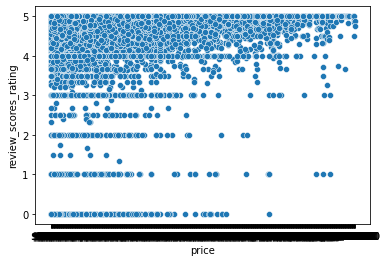

In [26]:
#x: price, y: reviews
sns.scatterplot(data=nyc_listings_df, x=nyc_listings_df["price"], y=nyc_listings_df["review_scores_rating"])

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

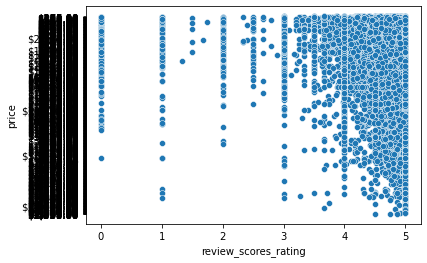

In [27]:
#x: reviews, y: price
sns.scatterplot(data=nyc_listings_df, x=nyc_listings_df["review_scores_rating"], y=nyc_listings_df["price"])
#the outlier is crazy i think we need to remove it (id = 11153)

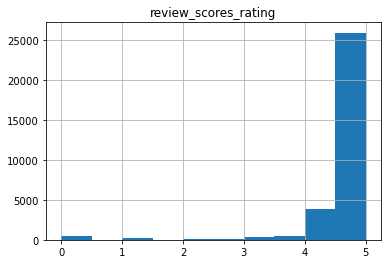

In [28]:
df = nyc_listings_df
hist = df.hist(column='review_scores_rating')

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

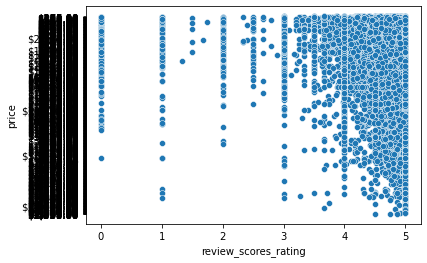

In [29]:
sns.scatterplot(data=nyc_listings_df, x=nyc_listings_df["review_scores_rating"], y=nyc_listings_df["price"])

### Questions for Reviewers